<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [3]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [4]:
filename="Wholesale customers data.csv"
cust_df = pd.read_csv("Wholesale customers data.csv")# loading the data: Wholesale customers data

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen  

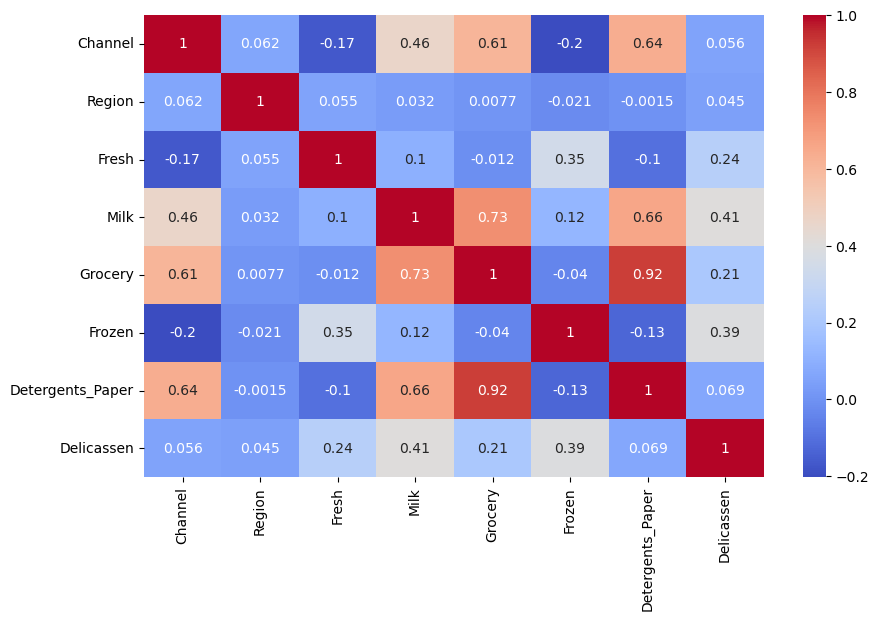

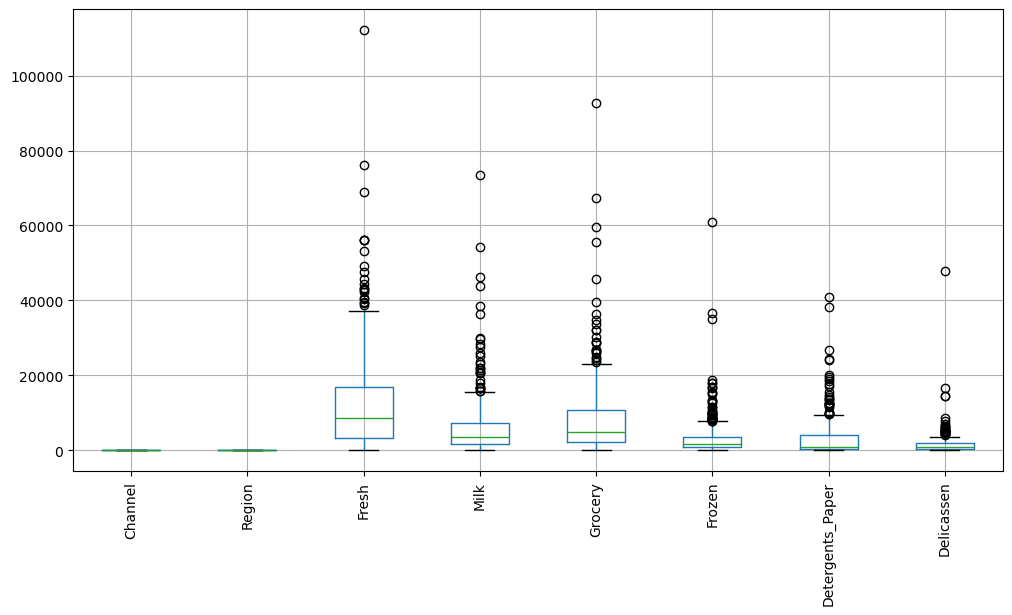

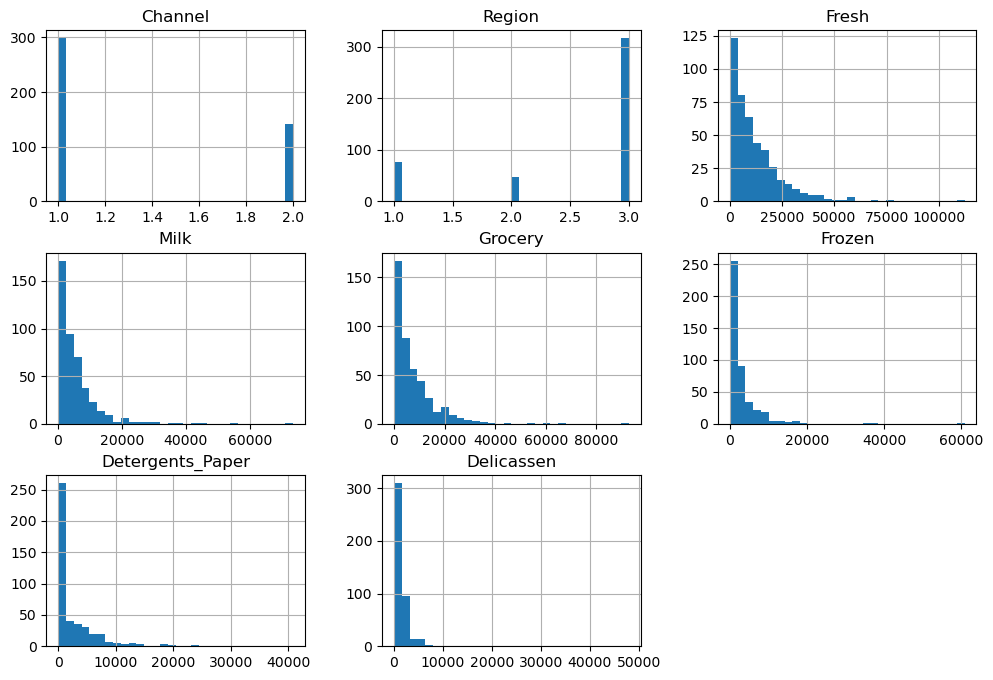

In [5]:
print(cust_df.head())
print(cust_df.info())
print(cust_df.columns)
print(cust_df.dtypes)
plt.figure(figsize=(10,6))
sns.heatmap(cust_df.corr(), annot=True, cmap="coolwarm")
plt.show()
plt.figure(figsize=(12,6))
cust_df.boxplot()
plt.xticks(rotation=90)
plt.show()
cust_df.hist(figsize=(12,8), bins=30)
plt.show()
# Your code here:

**Your observations here**

- ex.: Frozen, Grocery, Milk and Detergents Paper have a high...
- ...



# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [6]:
from sklearn.preprocessing import StandardScaler

cust_df_drop = cust_df.drop(columns=["Detergents_Paper"])
X = cust_df_drop.quantile(0.25)
Y = cust_df_drop.quantile(0.75)
IQR = Y - X
lower_bound = X - 1.5 * IQR
upper_bound = Y + 1.5 * IQR
cust_df_ = cust_df_drop[~((cust_df_drop < lower_bound) | (cust_df_drop > upper_bound)).any(axis=1)]

if cust_df_.empty:
	raise ValueError("The cleaned DataFrame is empty. Please check the bounds calculation.")

scaler = StandardScaler()
scale = scaler.fit_transform(cust_df_)
scale = pd.DataFrame(scale, columns=cust_df_.columns)
print(scale.head())

    Channel    Region     Fresh      Milk   Grocery    Frozen  Delicassen
0  1.516895  0.596973  0.403699  1.561704  0.253627 -0.967099    0.388116
1  1.516895  0.596973 -0.287344  1.606056  0.625771 -0.053693    0.917268
2 -0.659241  0.596973  0.477089 -0.874782 -0.365687  2.685342    0.931765
3  1.516895  0.596973  0.002766  1.159367 -0.197879 -0.700394    0.524632
4  1.516895  0.596973  0.336836 -0.297916  0.144969 -0.810144   -0.569915


**Your comment here**

-  ...
-  ...

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [7]:
# Your import here:

from sklearn.preprocessing import StandardScaler
customers_scale = scale


# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [8]:
from sklearn.cluster import KMeans
kmeanscluster = KMeans(n_clusters=3, random_state=42)
kmeanscluster.fit(customers_scale)
customers_scale["labels"]=kmeanscluster.labels_


Exception in thread Thread-6 (_readerthread):
Traceback (most recent call last):
  File "c:\Users\megap\anaconda3\Lib\threading.py", line 1075, in _bootstrap_inner
    self.run()
  File "c:\Users\megap\anaconda3\Lib\threading.py", line 1012, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\megap\anaconda3\Lib\subprocess.py", line 1599, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "<frozen codecs>", line 322, in decode
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc7 in position 26: invalid continuation byte
c:\Users\megap\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
'NoneType' object has no attribute 'splitlines'
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\megap\anaconda3\Lib\si

### Looking to the elbow we can choose 2 like the correct number of clusters

In [9]:
kmeans_2 = KMeans(n_clusters=2).fit(customers_scale)

labels = kmeans_2.predict(customers_scale)

clusters = kmeans_2.labels_.tolist()

c:\Users\megap\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [10]:
cust_df_['Label'] = clusters

C:\Users\megap\AppData\Local\Temp\ipykernel_18020\3162597036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_df_['Label'] = clusters


Count the values in `labels`.

In [11]:
pd.Series(labels).value_counts()# Your code here:

0    225
1    115
Name: count, dtype: int64

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [12]:
from sklearn.cluster import DBSCAN 
dbscan = DBSCAN(eps=2, min_samples=5)
clusters = dbscan.fit_predict(customers_scale)
customers_scale["labels_DBSCAN"] = clusters


# Your code here


Count the values in `labels_DBSCAN`.

In [13]:
print(customers_scale["labels_DBSCAN"].value_counts)# Your code here

<bound method IndexOpsMixin.value_counts of 0      0
1      0
2     -1
3      0
4      0
      ..
335    1
336    1
337    1
338    1
339    1
Name: labels_DBSCAN, Length: 340, dtype: int64>


# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [14]:
def plot(x,y,hue):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue)
    plt.title('Detergents Paper vs Milk ')
    return plt.show();

C:\Users\megap\AppData\Local\Temp\ipykernel_18020\292755410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_df_["labels_DBSCAN"] = dbscan.labels_
C:\Users\megap\AppData\Local\Temp\ipykernel_18020\292755410.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_df_["Detergents_Paper"] = cust_df.loc[cust_df_.index, "Detergents_Paper"]


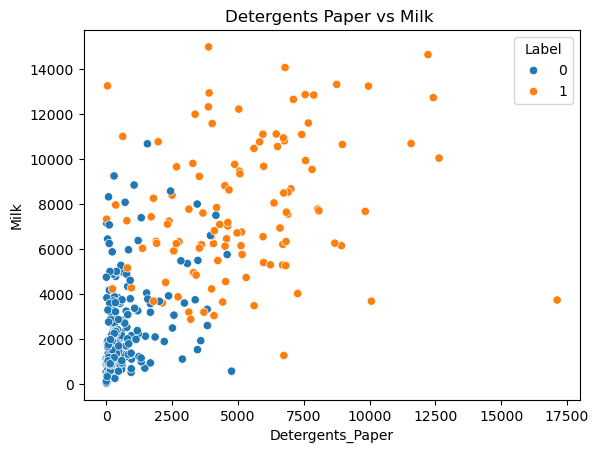

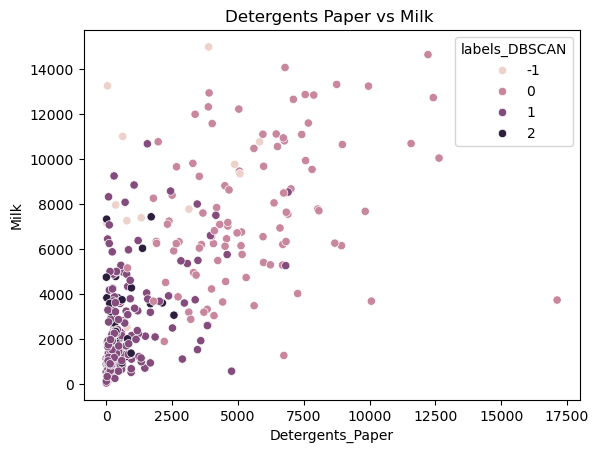

In [15]:
cust_df_["labels_DBSCAN"] = dbscan.labels_
cust_df_["Detergents_Paper"] = cust_df.loc[cust_df_.index, "Detergents_Paper"]
plot(x=cust_df_["Detergents_Paper"], y=cust_df_["Milk"], hue=cust_df_["Label"])
plot(x=cust_df_["Detergents_Paper"], y=cust_df_["Milk"], hue=cust_df_["labels_DBSCAN"])# Your code here:

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

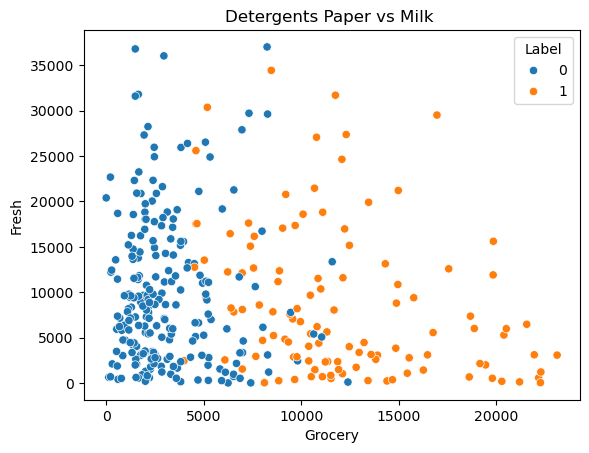

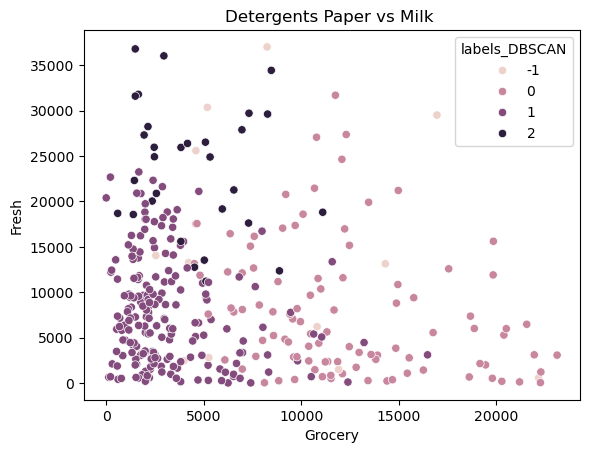

In [16]:
plot(x=cust_df_["Grocery"], y=cust_df_["Fresh"], hue=cust_df_["Label"])
plot(x=cust_df_["Grocery"], y=cust_df_["Fresh"], hue=cust_df_["labels_DBSCAN"])# Your code here:

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

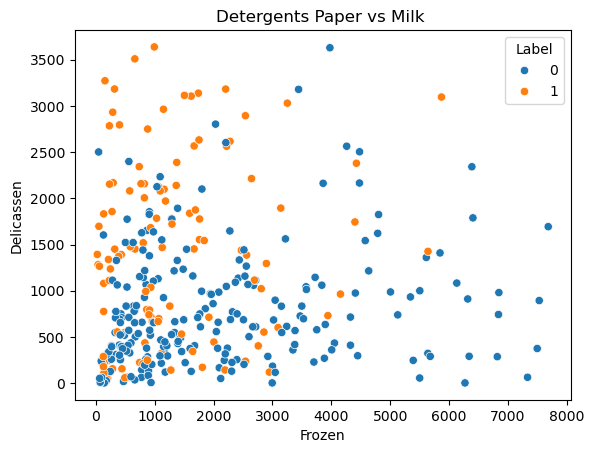

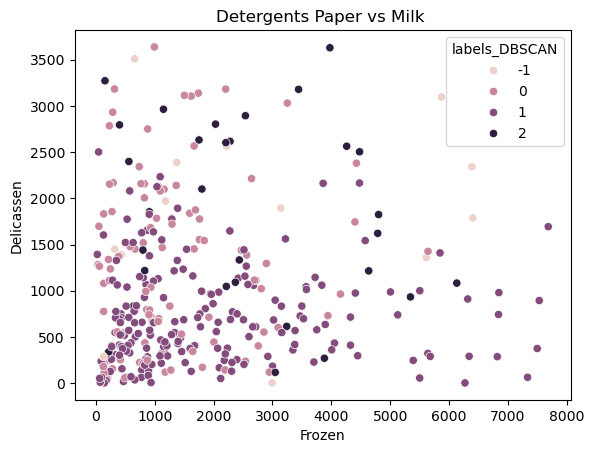

In [17]:
plot(x=cust_df_["Frozen"], y=cust_df_["Delicassen"], hue=cust_df_["Label"])
plot(x=cust_df_["Frozen"], y=cust_df_["Delicassen"], hue=cust_df_["labels_DBSCAN"])# Your code here:

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [18]:
print(cust_df_.groupby("Label").mean())
print(cust_df_.groupby("labels_DBSCAN").mean())# Your code here:

        Channel    Region        Fresh        Milk       Grocery       Frozen  \
Label                                                                           
0      1.017778  2.462222  9817.715556  2429.60000   3156.204444  2130.995556   
1      1.860870  2.669565  8554.756522  7762.66087  12135.069565  1309.086957   

        Delicassen  labels_DBSCAN  Detergents_Paper  
Label                                                
0       806.600000       1.057778        709.293333  
1      1427.886957       0.052174       5101.095652  
                Channel    Region         Fresh         Milk       Grocery  \
labels_DBSCAN                                                                
-1             1.230769  2.153846  13790.769231  8490.692308   9678.153846   
 0             2.000000  2.700000   7864.570000  7559.660000  12190.120000   
 1             1.000000  2.502538   7694.736041  2434.761421   3188.091371   
 2             1.000000  2.333333  23706.100000  3112.433333   4426.5

Which algorithm appears to perform better?

**Your observations here**
#DBSCAN is better because besides being a little more difficult to read, it gives more information
- 

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [19]:
# Your code here:

**Your comment here**

- 

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [20]:
# Your code here

**Your comment here**

- 